In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew , kurtosis
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
hospitales = pd.read_csv("hospitales.csv")

In [3]:
hospitales = hospitales.rename(columns={'ano':'anio'})

In [4]:
hospitales['mes'] = hospitales['mes'].str.title()

In [5]:
hospitales.tail(15)

,fecha,anio,mes,dia,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex,camas_generales_totales,camas_generales_cdmx,camas_generales_edomex
454,21/06/2021,2021,Junio 2021,21,858,665,193,280,248,32,578,417,161
455,22/06/2021,2021,Junio 2021,22,895,679,216,291,253,38,604,426,178
456,23/06/2021,2021,Junio 2021,23,882,677,205,285,245,40,597,432,165
457,24/06/2021,2021,Junio 2021,24,943,716,227,306,263,43,637,453,184
458,25/06/2021,2021,Junio 2021,25,943,710,233,315,268,47,628,442,186
459,26/06/2021,2021,Junio 2021,26,962,731,231,320,276,44,642,455,187
460,27/06/2021,2021,Junio 2021,27,990,755,235,321,279,42,669,476,193
461,28/06/2021,2021,Junio 2021,28,1031,785,246,324,285,39,707,500,207
462,29/06/2021,2021,Junio 2021,29,1076,810,266,337,300,37,739,510,229
463,30/06/2021,2021,Junio 2021,30,1140,866,274,361,320,41,779,546,233


In [54]:
hospitales['hospitalizados_totales'].sum()

2077990

In [55]:
hospitales['camas_intubados_totales'].sum()

515942

In [6]:
hospitales2 = hospitales.drop(['fecha','mes','anio','dia'],axis=1)
hospitales2

,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex,camas_generales_totales,camas_generales_cdmx,camas_generales_edomex
0,50,50,0,39,39,0,11,11,0
1,105,105,0,33,33,0,72,72,0
2,128,128,0,42,42,0,86,86,0
3,175,175,0,60,60,0,115,115,0
4,257,257,0,78,78,0,179,179,0
...,...,...,...,...,...,...,...,...,...
464,1158,862,296,352,310,42,806,552,254
465,1152,863,289,362,317,45,790,546,244
466,1209,901,308,380,333,47,829,568,261
467,1249,921,328,378,333,45,871,588,283


In [7]:
mes = hospitales.groupby("mes", sort=False, as_index=False).sum()
mes = mes.drop(['anio','dia'],axis=1)
mes

,mes,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex,camas_generales_totales,camas_generales_cdmx,camas_generales_edomex
0,Marzo 2020,1625,1587,38,567,558,9,1058,1029,29
1,Abril 2020,56633,42306,13766,15414,12539,2834,40962,29767,10780
2,Mayo 2020,177979,124361,53084,40235,30851,9364,137744,93510,43720
3,Junio 2020,178642,126455,52187,40149,30015,10134,138493,96440,42053
4,Julio 2020,148014,107603,40411,35168,25932,9236,112846,81671,31175
5,Agosto 2020,124146,91001,33145,30128,22663,7465,94018,68338,25680
6,Septiembre 2020,110467,83610,26857,26141,20645,5496,84326,62965,21361
7,Octubre 2020,112403,83958,28445,27186,21574,5616,85217,62384,22829
8,Noviembre 2020,131532,98562,32970,30984,24614,6370,100548,73948,26600
9,Diciembre 2020,212181,152883,59298,48598,37858,10740,163583,115025,48558


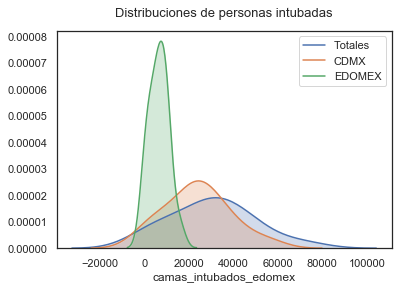

In [8]:
sns.set(style='white')

ax = sns.distplot(mes['camas_intubados_totales'], hist = False, kde_kws = {'shade': True}, label='Totales')
sns.distplot(mes['camas_intubados_cdmx'], hist = False, kde_kws = {'shade': True},label='CDMX')
sns.distplot(mes['camas_intubados_edomex'], hist = False, kde_kws = {'shade': True},label='EDOMEX')
ax.set_title('Distribuciones de personas intubadas', fontsize=13, pad=15);

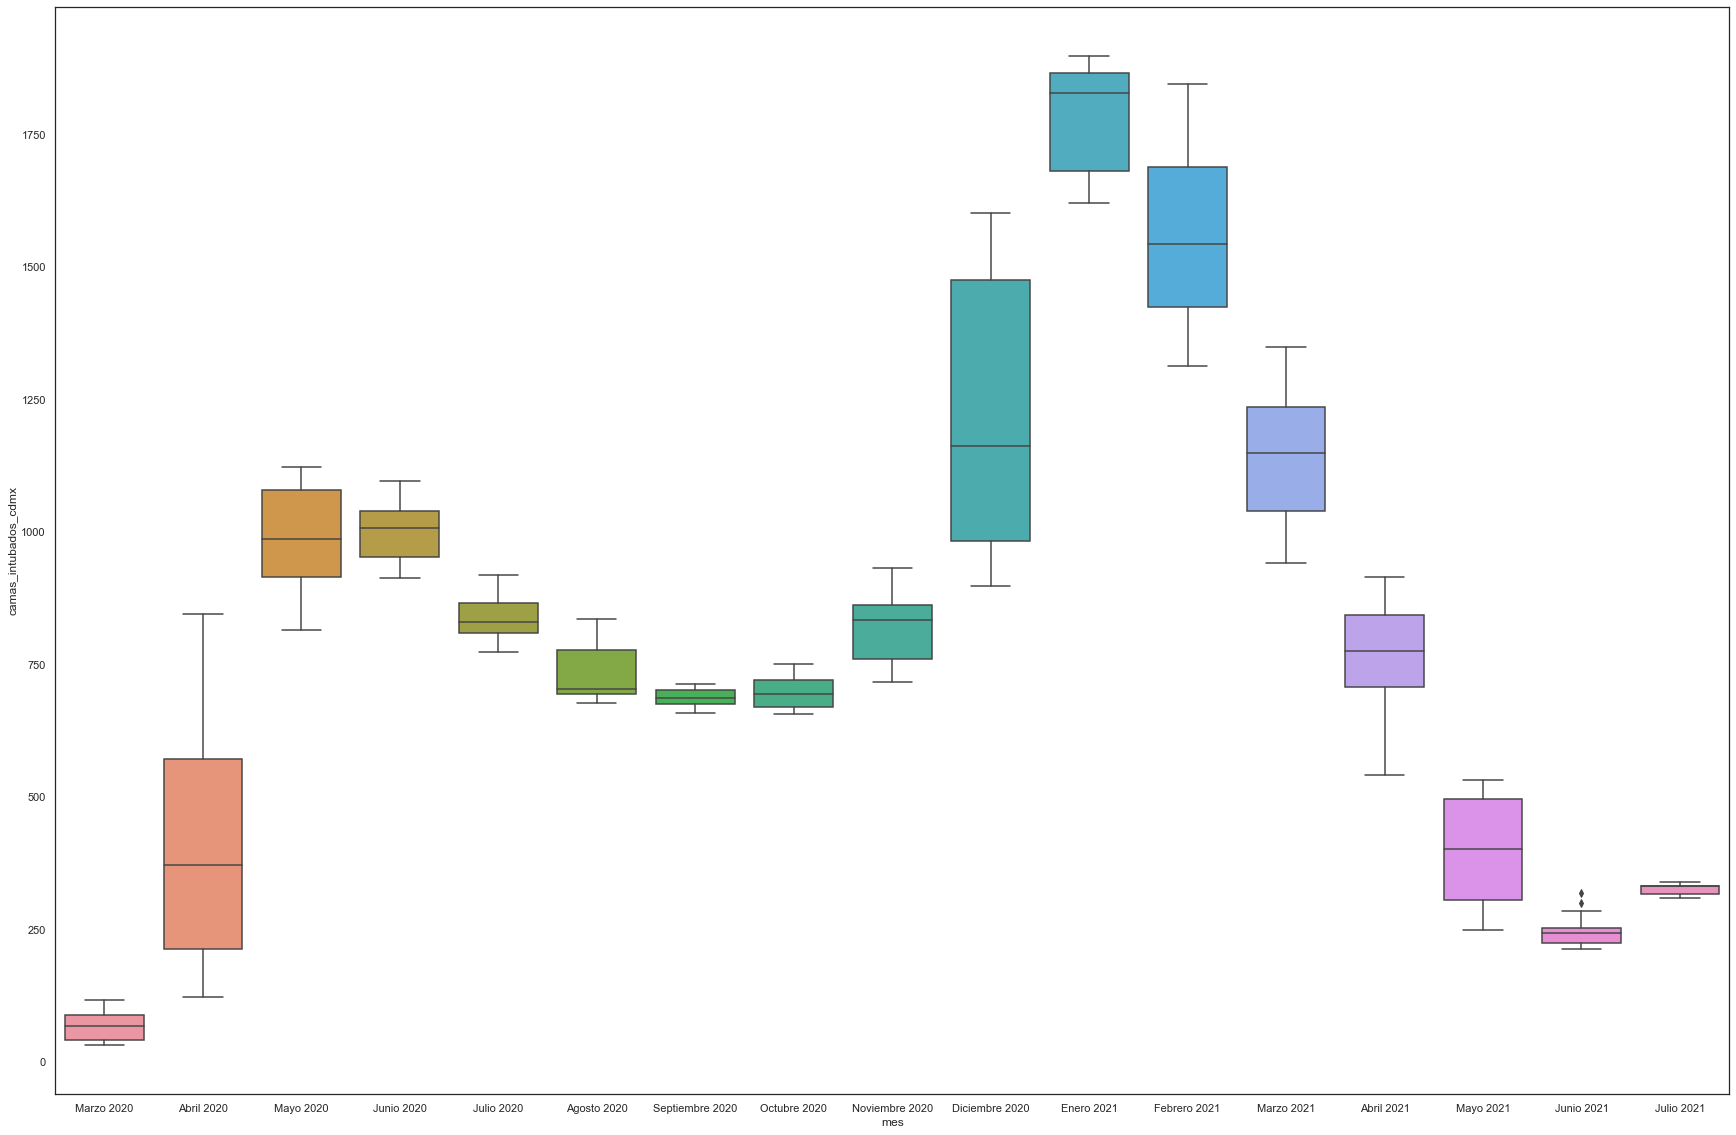

In [9]:
plt.figure(figsize=(30, 20))
sns.boxplot(data=hospitales, x='mes', y='camas_intubados_cdmx');

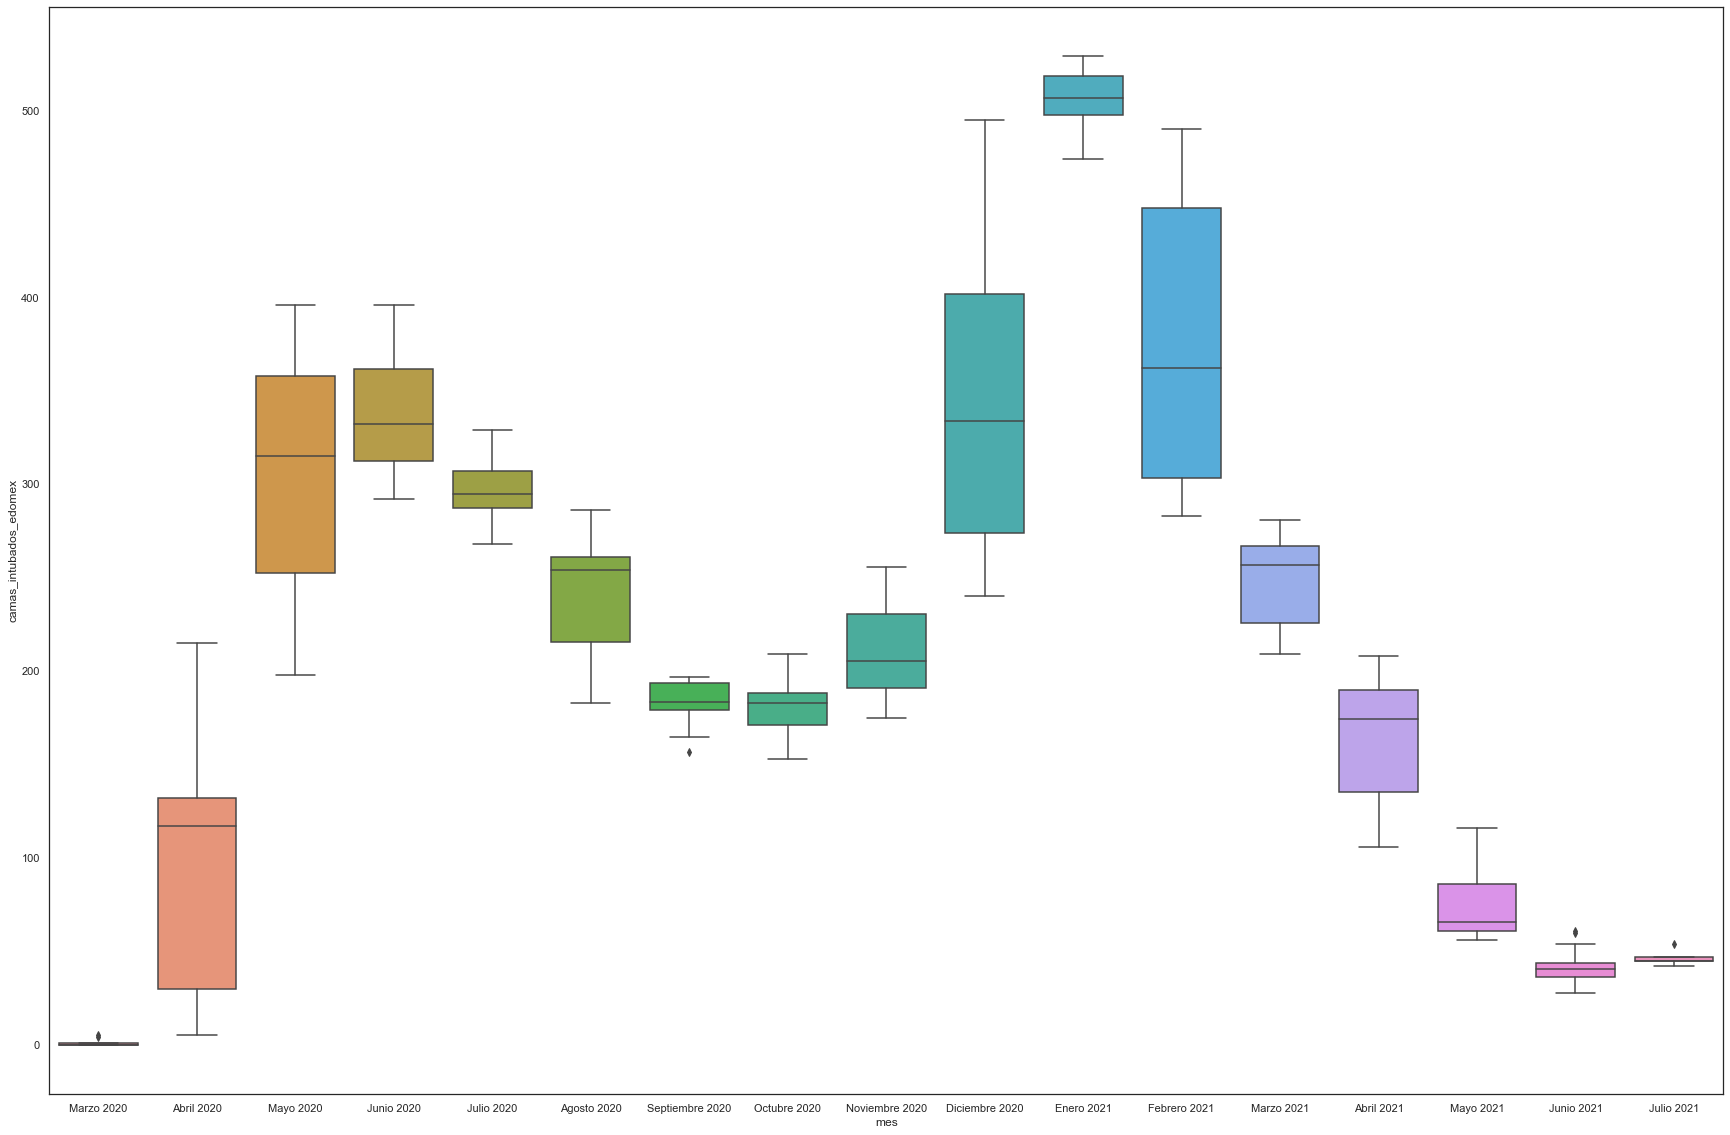

In [10]:
plt.figure(figsize=(30, 20))
sns.boxplot(data=hospitales, x='mes', y='camas_intubados_edomex');

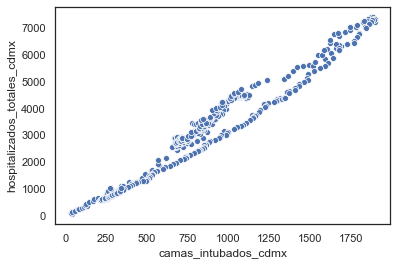

In [11]:
#correlacion intubados y hospitalizados cdmx
sns.scatterplot(hospitales2['camas_intubados_cdmx'], hospitales2['hospitalizados_totales_cdmx'])

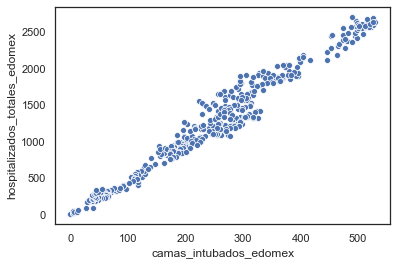

In [12]:
#correlacion intubados y hospitalizados edomex
sns.scatterplot(hospitales2['camas_intubados_edomex'], hospitales2['hospitalizados_totales_edomex']);

In [13]:
lr = LinearRegression()

# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(hospitales2['camas_intubados_edomex'].to_frame(), hospitales2['hospitalizados_totales_edomex'])

LinearRegression()

In [14]:
y_predict = lr.predict(hospitales2['camas_intubados_edomex'].to_frame())

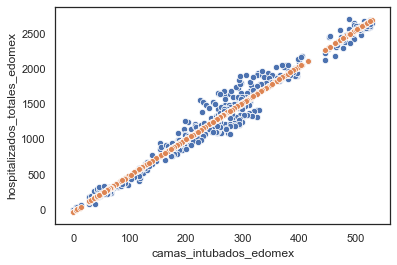

In [15]:
sns.scatterplot(hospitales2['camas_intubados_edomex'], hospitales2['hospitalizados_totales_edomex'], s=40);
sns.scatterplot(hospitales2['camas_intubados_edomex'], y_predict, s=35);

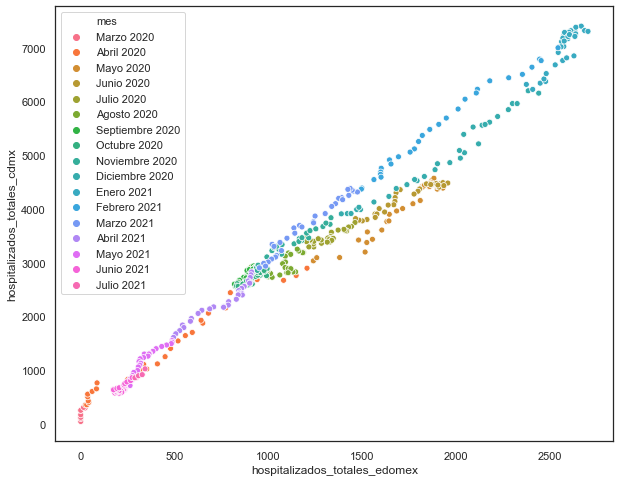

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(hospitales['hospitalizados_totales_edomex'], hospitales['hospitalizados_totales_cdmx'], hue=hospitales['mes'], ax=ax);